# Introduction

To make a recommendation to TfL this analysis seeks to find out how more usage of hired cycles could impact the total number of cyclists. The data is taken from the file https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1101114/nts0608.ods as the data is very little, the numbers are copied into this notebook manually.

Particularly try to make a prediction over time.

## Bike Ownership

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Convert the nts0608 file into a DataFrame. 
# Create a list of the data
data = {'age_group':['5-10', '11-16', '17-20', '21-29', '30-39', '40-49', '50-59', '60+', 'all'],
        'percentage_own':[0.89, 0.7, 0.45, 0.39, 0.43, 0.53, 0.49, 0.28, 0.47]}

bike_ownership = pd.DataFrame(data)

print(bike_ownership)

  age_group  percentage_own
0      5-10            0.89
1     11-16            0.70
2     17-20            0.45
3     21-29            0.39
4     30-39            0.43
5     40-49            0.53
6     50-59            0.49
7       60+            0.28
8       all            0.47


In [2]:
# Calculate the percentages who does not own a bike
bike_ownership['percentage_not_own'] = 1 - bike_ownership['percentage_own']

bike_ownership

,age_group,percentage_own,percentage_not_own
0,5-10,0.89,0.11
1,11-16,0.70,0.30
2,17-20,0.45,0.55
3,21-29,0.39,0.61
4,30-39,0.43,0.57
5,40-49,0.53,0.47
6,50-59,0.49,0.51
7,60+,0.28,0.72
8,all,0.47,0.53


<AxesSubplot:xlabel='percentage_not_own', ylabel='age_group'>

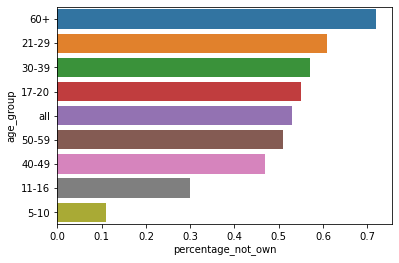

In [3]:
# Visualize the dataframe to get a better picture of the age group with least access to bikes
import seaborn as sns

sns.barplot(data = bike_ownership,
            x = 'percentage_not_own', y = 'age_group',
            order = bike_ownership.sort_values('percentage_not_own',ascending = False).age_group)

In [4]:
# Print the dataframe and sort by the largest groups that do now have access to a bike
bike_ownership.sort_values(by = ['percentage_not_own'], ascending = False)

,age_group,percentage_own,percentage_not_own
7,60+,0.28,0.72
3,21-29,0.39,0.61
4,30-39,0.43,0.57
2,17-20,0.45,0.55
8,all,0.47,0.53
6,50-59,0.49,0.51
5,40-49,0.53,0.47
1,11-16,0.70,0.30
0,5-10,0.89,0.11


### Findings

groups 60+, 21-29 and 30-39 can be a good target group to investigate further

### Next steps

The Road counts file will be added to assess the total number of cyclists. 
The percentage split of hired vs private cycles in London will also be shown in this file so that we can predict how much of an impact it would have by increasing the usage of hired cycles within the age groups 60+ 21-29 and 30-39.

## Road Counts

In [5]:
# Import the road count file which lists the total number of cycle trips made within London

raw_counts = pd.read_csv(r'C:\snowflake\raw_counts.csv')

print(raw_counts.columns.values)
raw_counts.describe()

['count_point_id' 'year' 'date' 'hour' 'rd_name' 'rd_type' 'lat' 'long'
 'link_length_km' 'bicycles' 'motorcycles' 'cars' 'bus' 'lvg' 'hgv'
 'all_motor_vehicles' 'all_trips']


,count_point_id,year,hour,lat,long,link_length_km,bicycles,motorcycles,cars,bus,lvg,hgv,all_motor_vehicles,all_trips
count,381732.000000,381732.000000,381732.000000,381732.000000,381732.000000,211476.000000,381732.000000,381732.000000,381732.000000,381732.000000,381732.000000,381731.000000,381731.000000,381731.000000
mean,435378.664707,2010.183270,12.500000,51.501347,-0.130546,1.372497,13.536646,21.539949,538.817477,15.701078,114.215926,38.518045,728.790772,742.327401
std,445905.472245,6.136586,3.452057,0.075382,0.162348,1.155943,41.941374,39.787338,668.118039,22.310143,158.045475,80.304159,893.745495,896.550492
min,6000.000000,2000.000000,7.000000,51.292607,-0.504160,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28758.000000,2005.000000,9.750000,51.452935,-0.244069,0.500000,0.000000,1.000000,101.000000,1.000000,16.000000,2.000000,131.000000,137.000000
50%,59036.000000,2010.000000,12.500000,51.505018,-0.124652,1.100000,3.000000,7.000000,345.000000,9.000000,63.000000,11.000000,469.000000,483.000000
75%,942505.000000,2016.000000,15.250000,51.554027,-0.022601,1.900000,10.000000,24.000000,656.000000,21.000000,136.000000,37.000000,887.000000,912.000000
max,999994.000000,2021.000000,18.000000,51.684340,0.297665,8.500000,2207.000000,763.000000,9709.000000,700.000000,3211.000000,2498.000000,10905.000000,10905.000000


In [6]:
# Subset the dataframe to make it easier to work with, drop the columns except year, bicylces and total trips counted
raw_counts_short = raw_counts[['year', 'bicycles', 'all_trips']]

raw_counts_short = raw_counts_short.groupby(by = ['year']).sum()

raw_counts_short

,bicycles,all_trips
year,,
2000,124832,14730550.0
2001,149593,15815847.0
2002,159151,14146755.0
2003,232772,15658527.0
2004,207289,14082449.0
2005,186258,12298329.0
2006,207895,12858530.0
2007,228253,13410166.0
2008,298218,14443572.0


In [7]:
# Transpose the dataframe to make it easier to work with.
raw_counts_yoy= raw_counts_short.T

# Keep the last 7 years of available data
raw_counts_yoy = raw_counts_yoy[[2016, 2017, 2018, 2019, 2020, 2021]]

raw_counts_yoy

year,2016,2017,2018,2019,2020,2021
bicycles,245973.0,235580.0,398188.0,233353.0,187437.0,196861.0
all_trips,8529036.0,10959711.0,9737509.0,11221704.0,7011594.0,10562373.0


In [8]:
# Produce the same subset of the raw counts with average daily trips as opposed to absolute values

raw_counts_avg = raw_counts[['year', 'bicycles', 'all_trips']]

raw_counts_avg = raw_counts_avg.groupby(by = ['year']).mean()

raw_counts_avg_yoy = raw_counts_avg.T

raw_counts_avg_yoy = raw_counts_avg_yoy[[2016, 2017, 2018, 2019, 2020, 2021]]

raw_counts_avg_yoy

year,2016,2017,2018,2019,2020,2021
bicycles,17.181685,15.373271,17.897699,10.591549,17.530584,16.083415
all_trips,595.769489,715.199099,437.680196,509.336601,655.779461,862.938971


## London Data

The london dataset is used to understand the number of hired vs private cycles in London for the same 
time period as the numebr of cyclists

In [9]:
# Load London data 
inner = pd.read_csv('inner.csv')
outer = pd.read_csv('Outer London.csv')
central = pd.read_csv('central.csv')

In [10]:
# Add columns 
central['area'] = 'Central'
inner['area'] = 'Inner'
outer['area'] = 'Outer'
central['Survey wave (year)'] = [central['Survey wave (calendar quarter)'][i].split()[0] 
                                 for i in range(central.shape[0])]

# Join London dataframes 
london = pd.concat([central, inner, outer]).reset_index(drop=True)

print(london.columns)
london.head()

Index(['Survey wave (calendar quarter)', 'Equivalent financial quarter',
       'Site ID', 'Location', 'Survey date', 'Weather', 'Time', 'Period',
       'Direction', 'Start hour', 'Start minute', 'Number of private cycles',
       'Number of cycle hire bikes', 'Total cycles', 'area',
       'Survey wave (year)', 'Number of male cycles',
       'Number of female cycles', 'Number of unknown cycles'],
      dtype='object')


,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,area,Survey wave (year),Number of male cycles,Number of female cycles,Number of unknown cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0,Central,2014,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15,Central,2014,NaN,NaN,NaN
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35,Central,2014,NaN,NaN,NaN
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61,Central,2014,NaN,NaN,NaN
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73,Central,2014,NaN,NaN,NaN


In [11]:
# Drop unneeded columns from the dataframe
london = london[['Survey wave (year)', 'Number of private cycles', 'Number of cycle hire bikes']]

# Rename the columns
london.rename(columns = {'Survey wave (year)' : 'year', 'Number of private cycles': 'private', 'Number of cycle hire bikes' : 'hired'}, inplace=True)

london

,year,private,hired
0,2014,0.0,0.0
1,2014,15.0,0.0
2,2014,35.0,0.0
3,2014,59.0,2.0
4,2014,73.0,0.0
...,...,...,...
1657594,2021,NaN,NaN
1657595,2021,NaN,NaN
1657596,2021,NaN,NaN
1657597,2021,NaN,NaN


In [12]:
# Drop the rows where there are no records
london_clean = london.dropna()

# Group the data based on year 
london_clean = london_clean.groupby(by = ['year']).mean()

# Calculate average share of hired vs private cycles
london_clean['private_prop'] = london_clean['private'] / (london_clean['private'] + london_clean['hired'])
london_clean['hired_prop'] = 1- london_clean['private_prop']
london_clean

,private,hired,private_prop,hired_prop
year,,,,
2015,5.679805,0.208425,0.964603,0.035397
2016,5.549401,0.230305,0.960153,0.039847
2017,5.654902,0.239138,0.959427,0.040573
2018,5.727426,0.271998,0.954663,0.045337
2019,5.559961,0.313586,0.946610,0.053390
2020,8.120388,0.416070,0.951260,0.048740
2021,5.959635,0.250175,0.959713,0.040287
2014,14.006628,1.624600,0.896067,0.103933
2015,14.244422,1.657523,0.895766,0.104234


In [13]:
# Drop the absolute values
london_clean = london_clean[['private_prop', 'hired_prop']]

london_clean

,private_prop,hired_prop
year,,
2015,0.964603,0.035397
2016,0.960153,0.039847
2017,0.959427,0.040573
2018,0.954663,0.045337
2019,0.946610,0.053390
2020,0.951260,0.048740
2021,0.959713,0.040287
2014,0.896067,0.103933
2015,0.895766,0.104234


In [14]:
# Transpose the dataframe
london_clean = london_clean.T

# Keep the last six years worth of data
london_clean = london_clean[[2016, 2017, 2018, 2019, 2020, 2021]]

In [15]:
# View the dataframe

london_clean

year,2016,2017,2018,2019,2020,2021
private_prop,0.960153,0.959427,0.954663,0.94661,0.95126,0.959713
hired_prop,0.039847,0.040573,0.045337,0.05339,0.04874,0.040287


## Next steps

* Determine the number of bicycle trips with the assumption that the split is consistent across both data sources. 
* Considering all things equal how much would an increase in hired cycles improve the overall numbers and by how much?

In [16]:
# Transpose the datasets 
london_cleanT = london_clean.T
raw_countsT = raw_counts_yoy.T
raw_counts_meanT = raw_counts_avg_yoy.T

In [17]:
# Merge the datasets 
cycle_counts = pd.merge(london_cleanT, raw_countsT, left_index=True, right_index=True)
cycle_counts

# Calculate the proportion of bicycles of all the trips 
cycle_counts['cycle_prop'] = round(cycle_counts['bicycles'] / cycle_counts['all_trips'],4)

In [18]:
# Create calculated columns to determine the absolute number of hired vs private cycles
cycle_counts['private_cycles'] = round(cycle_counts['private_prop'] * cycle_counts['bicycles'])
cycle_counts['hired_cycles'] = round(cycle_counts['hired_prop'] * cycle_counts['bicycles'])

cycle_counts

,private_prop,hired_prop,bicycles,all_trips,cycle_prop,private_cycles,hired_cycles
year,,,,,,,
2016,0.960153,0.039847,245973.0,8529036.0,0.0288,236172.0,9801.0
2017,0.959427,0.040573,235580.0,10959711.0,0.0215,226022.0,9558.0
2018,0.954663,0.045337,398188.0,9737509.0,0.0409,380135.0,18053.0
2019,0.946610,0.053390,233353.0,11221704.0,0.0208,220894.0,12459.0
2020,0.951260,0.048740,187437.0,7011594.0,0.0267,178301.0,9136.0
2021,0.959713,0.040287,196861.0,10562373.0,0.0186,188930.0,7931.0


In [19]:
# Create 5 scenarios how a change in proportion of hired cycles would impact the total number of trips
cycle_counts['hired_cycles20'] = cycle_counts['hired_cycles'] * 1.2
cycle_counts['hired_cycles50'] = cycle_counts['hired_cycles'] * 1.5
cycle_counts['hired_cycles75'] = cycle_counts['hired_cycles'] * 1.75
cycle_counts['hired_cycles200'] = cycle_counts['hired_cycles'] * 2
cycle_counts['hired_cycles300'] = cycle_counts['hired_cycles'] * 3

cycle_counts

,private_prop,hired_prop,bicycles,all_trips,cycle_prop,private_cycles,hired_cycles,hired_cycles20,hired_cycles50,hired_cycles75,hired_cycles200,hired_cycles300
year,,,,,,,,,,,,
2016,0.960153,0.039847,245973.0,8529036.0,0.0288,236172.0,9801.0,11761.2,14701.5,17151.75,19602.0,29403.0
2017,0.959427,0.040573,235580.0,10959711.0,0.0215,226022.0,9558.0,11469.6,14337.0,16726.50,19116.0,28674.0
2018,0.954663,0.045337,398188.0,9737509.0,0.0409,380135.0,18053.0,21663.6,27079.5,31592.75,36106.0,54159.0
2019,0.946610,0.053390,233353.0,11221704.0,0.0208,220894.0,12459.0,14950.8,18688.5,21803.25,24918.0,37377.0
2020,0.951260,0.048740,187437.0,7011594.0,0.0267,178301.0,9136.0,10963.2,13704.0,15988.00,18272.0,27408.0
2021,0.959713,0.040287,196861.0,10562373.0,0.0186,188930.0,7931.0,9517.2,11896.5,13879.25,15862.0,23793.0


In [20]:
# How much would each of these scenarios impact the overall number of cyclists?
import warnings
warnings.filterwarnings("ignore")

scenario = cycle_counts[['bicycles', 'all_trips', 'cycle_prop']]
scenario['cycle_20'] = round(((cycle_counts['hired_cycles20'] + cycle_counts['private_cycles']) / scenario['all_trips'])\
                             - scenario['cycle_prop'],4)

scenario['cycle_50'] = round(((cycle_counts['hired_cycles50'] + cycle_counts['private_cycles']) / scenario['all_trips'])\
                             - scenario['cycle_prop'],4)

scenario['cycle_75'] = round(((cycle_counts['hired_cycles75'] + cycle_counts['private_cycles']) / scenario['all_trips'])\
                             - scenario['cycle_prop'],4)

scenario['cycle_200'] = round(((cycle_counts['hired_cycles200'] + cycle_counts['private_cycles']) / scenario['all_trips'])\
                             - scenario['cycle_prop'],4)

scenario['cycle_300'] = round(((cycle_counts['hired_cycles300'] + cycle_counts['private_cycles']) / scenario['all_trips'])\
                             - scenario['cycle_prop'],4)

scenario

,bicycles,all_trips,cycle_prop,cycle_20,cycle_50,cycle_75,cycle_200,cycle_300
year,,,,,,,,
2016,245973.0,8529036.0,0.0288,0.0003,0.0006,0.0009,0.0012,0.0023
2017,235580.0,10959711.0,0.0215,0.0002,0.0004,0.0006,0.0009,0.0017
2018,398188.0,9737509.0,0.0409,0.0004,0.0009,0.0014,0.0018,0.0037
2019,233353.0,11221704.0,0.0208,0.0002,0.0005,0.0008,0.0011,0.0022
2020,187437.0,7011594.0,0.0267,0.0003,0.0007,0.0010,0.0013,0.0026
2021,196861.0,10562373.0,0.0186,0.0002,0.0004,0.0006,0.0008,0.0015


Increasing the usage of hired cycles by 300% would have changed the proportion of total cyclists vs all trips made in London between 0.17%-0.37%. How much can TfL realistically increase the uptake in hired cycles?